In [11]:
import kagglehub


path = kagglehub.dataset_download("warcoder/mango-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/warcoder/mango-leaf-disease-dataset/versions/1


In [12]:
import os


class_names = [d.name for d in os.scandir(path) if d.is_dir()]

print("Available classes:", class_names)


Available classes: ['MangoLeafBD Dataset']


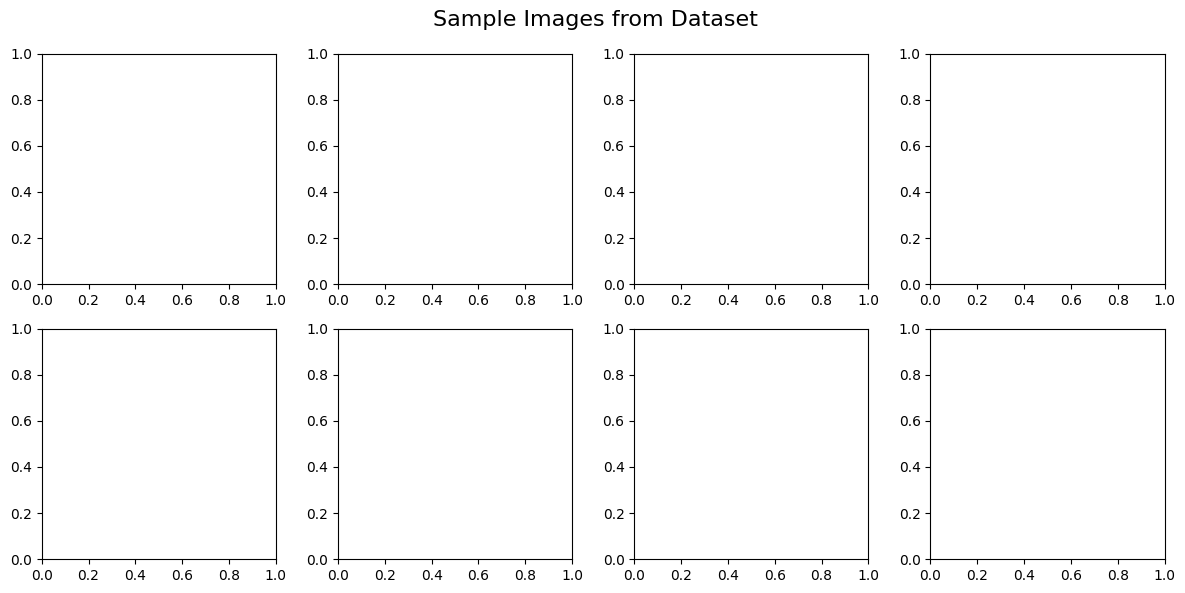

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random


dataset_path = path


class_folders = [d.path for d in os.scandir(dataset_path) if d.is_dir()]

image_paths = []
for folder in class_folders:
    image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_paths.extend(image_files)


sample_images = random.sample(image_paths, min(8, len(image_paths)))


fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Sample Images from Dataset", fontsize=16)
axes = axes.flatten()

# Display 8 images in 2x4 grid
for img_path, ax in zip(sample_images, axes):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [14]:
print("Dataset path:", path)


Dataset path: /root/.cache/kagglehub/datasets/warcoder/mango-leaf-disease-dataset/versions/1


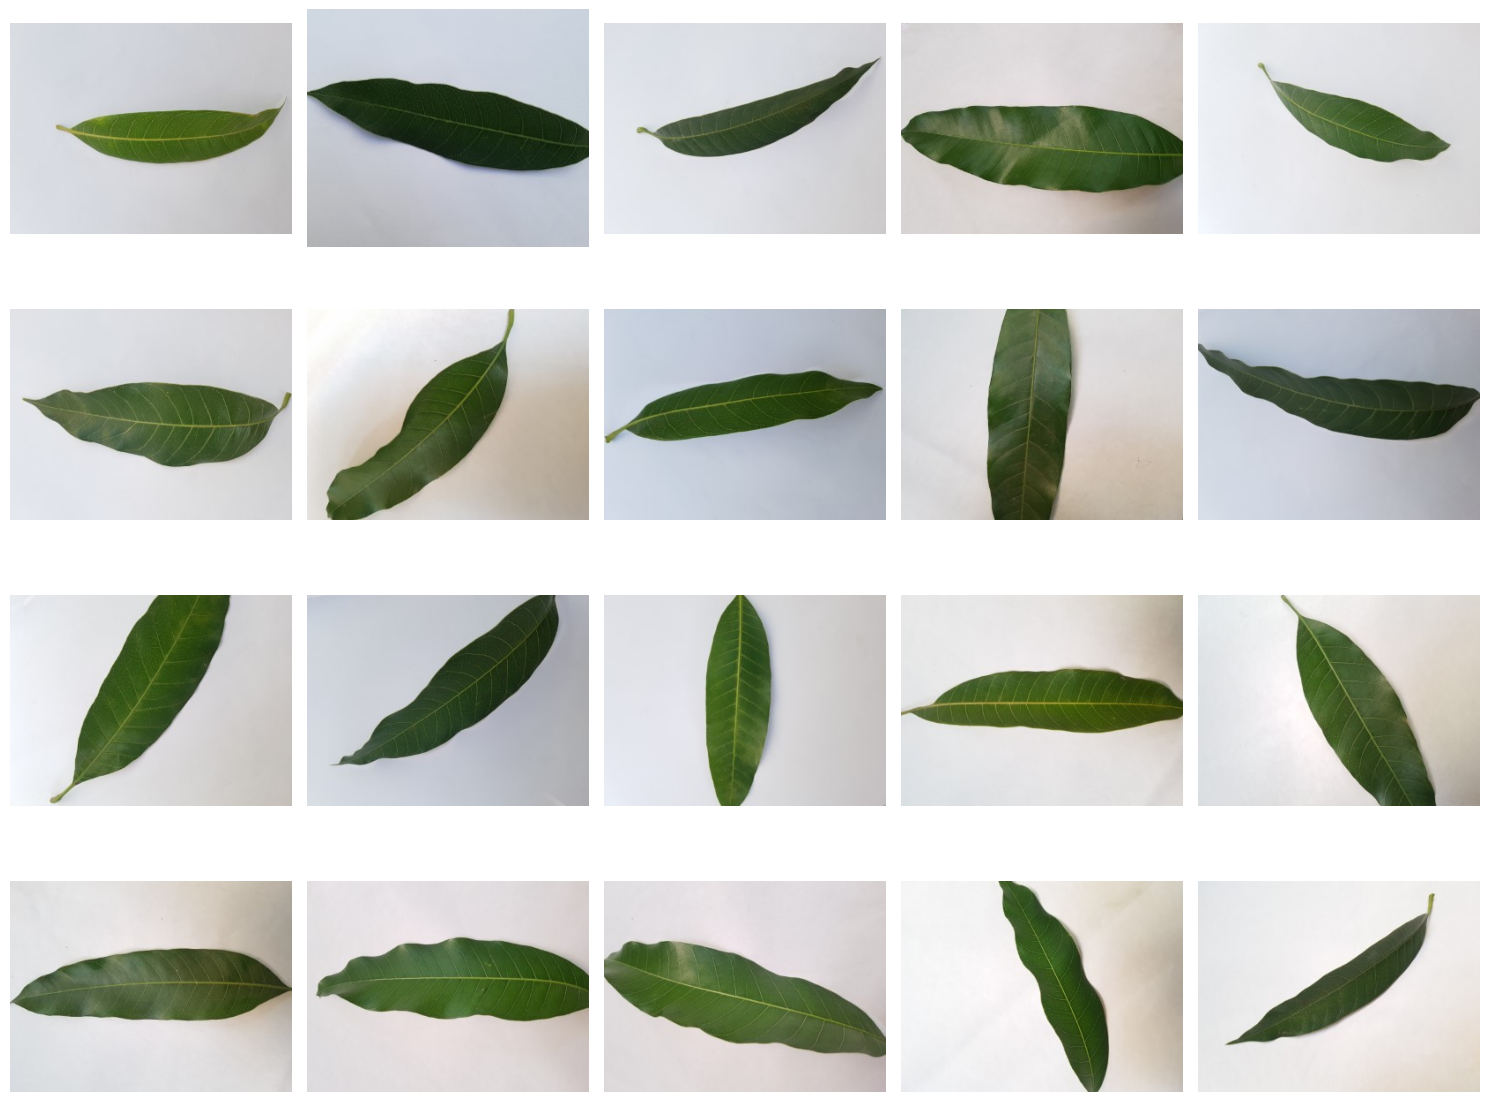

In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image


dataset_path = path


image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))


num_images_to_display = 20
image_paths = image_paths[:num_images_to_display]


columns = 5
rows = (len(image_paths) // columns) + (len(image_paths) % columns > 0)


fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 3))
axes = axes.flatten()


for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")

for i in range(len(image_paths), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [16]:
import os


dataset_path = path


total_images = 0

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1


print("Total number of images in the dataset:", total_images)


Total number of images in the dataset: 4000


In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


dataset_path = path

image_paths = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

img_size = (32, 32)
batch_size = 32

images = []
labels = []


for img_path in image_paths:
    img = keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    images.append(img_array)


    label = os.path.basename(os.path.dirname(img_path))
    labels.append(label)


unique_labels, y = np.unique(labels, return_inverse=True)


X = np.array(images) / 255.0
y = np.array(y)


print(f"Total images loaded: {len(X)}")


if len(X) == 0:
    raise ValueError("No images were found in the dataset. Please check the folder structure and image formats.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.1,
                             zoom_range=0.1, horizontal_flip=True,
                             fill_mode='nearest')


Total images loaded: 4000


In [18]:
print("Dataset path:", path)


Dataset path: /root/.cache/kagglehub/datasets/warcoder/mango-leaf-disease-dataset/versions/1


In [20]:

for label, class_folder in enumerate(os.listdir(dataset_path)):
    class_folder_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_folder_path):
        print(f"Processing folder: {class_folder_path}")  # Debugging output
        for img_file in os.listdir(class_folder_path):
            print(f"Found file: {img_file}")  # Debugging output
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_folder_path, img_file)
                img = keras.preprocessing.image.load_img(img_path, target_size=img_size)
                img_array = keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(label)


Processing folder: /root/.cache/kagglehub/datasets/warcoder/mango-leaf-disease-dataset/versions/1/MangoLeafBD Dataset
Found file: Healthy
Found file: Cutting Weevil
Found file: Die Back
Found file: Powdery Mildew
Found file: Gall Midge
Found file: Bacterial Canker
Found file: Anthracnose
Found file: Sooty Mould


In [28]:
#DEFINING CNN  MODEL

In [23]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(set(y)), activation='softmax')  # Number of classes
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
          validation_data=(X_test, y_test),
          epochs=50)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2685 - loss: 1.8693 - val_accuracy: 0.4363 - val_loss: 1.3147
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5816 - loss: 1.1459 - val_accuracy: 0.5987 - val_loss: 0.9525
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6756 - loss: 0.8808 - val_accuracy: 0.7250 - val_loss: 0.7977
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7464 - loss: 0.6949 - val_accuracy: 0.7575 - val_loss: 0.6759
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7802 - loss: 0.5865 - val_accuracy: 0.7750 - val_loss: 0.6038
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7940 - loss: 0.5579 - val_accuracy: 0.8388 - val_loss: 0.4355
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8476 - loss: 0.4400 - val_accuracy: 0.8525 - val_loss: 0.4103
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8577 - loss: 0.4167 - val_accu

In [29]:
#NOW DEFINE ANN MODEL

In [27]:
X = X.reshape(X.shape[0], -1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(len(unique_labels), activation='softmax')  # Output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_data=(X_test, y_test))


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2447 - loss: 1.9821 - val_accuracy: 0.3137 - val_loss: 1.6708
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4266 - loss: 1.4273 - val_accuracy: 0.4200 - val_loss: 1.3945
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 1.2606 - val_accuracy: 0.4712 - val_loss: 1.2740
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 1.1017 - val_accuracy: 0.5537 - val_loss: 1.1557
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 1.0249 - val_accuracy: 0.5825 - val_loss: 1.1208
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.9616 - val_accuracy: 0.5663 - val_loss: 1.1269
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6608 - loss: 0.9155 - val_accuracy: 0.6637 - val_loss: 0.9337
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7089 - loss: 0.8275 - val_accuracy: 0

In [44]:
#APPLYING KNN MODEL

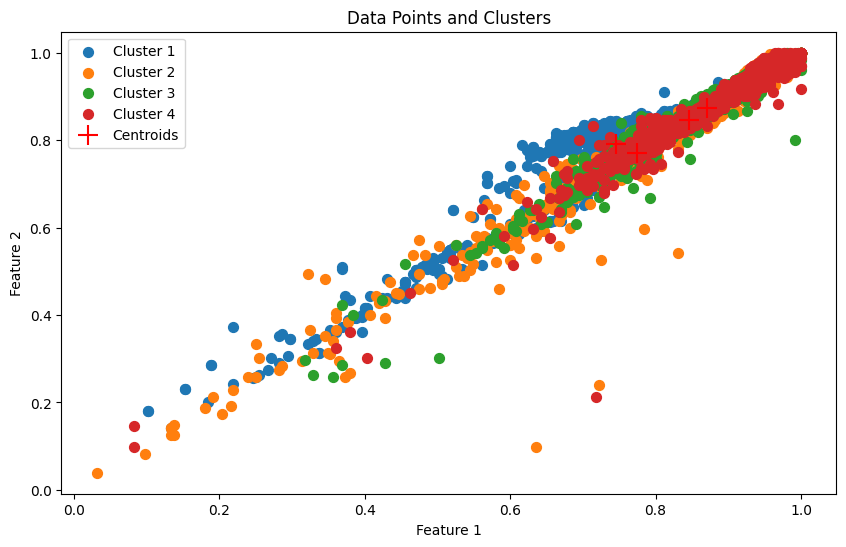

In [37]:
from sklearn.cluster import KMeans

X = np.array(images) / 255.0
X = X.reshape(X.shape[0], -1)


n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, label=f'Cluster {i+1}')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids',marker="+")
plt.title('Data Points and Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



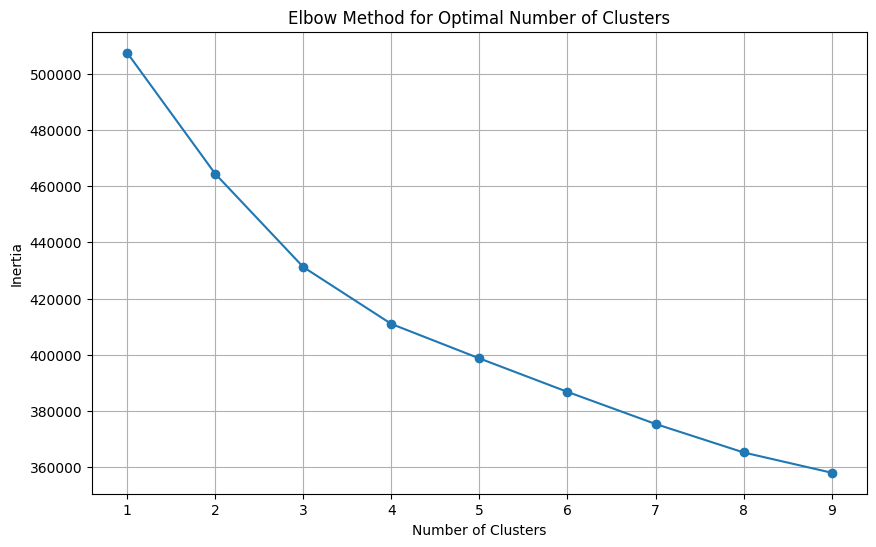

In [48]:
# Using Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [43]:
from sklearn.metrics import accuracy_score


X = X.reshape(X.shape[0], -1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test accuracy: {test_accuracy:.4f}")


KNN Test accuracy: 0.6808
